In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Polinom Lineer Regresyonu
#y = a + b*x + c*x^2 + ... + n*x^n + ...

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset = dataset.drop(['Position'], axis=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [6]:
dataset.head(10)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


StopIteration: 

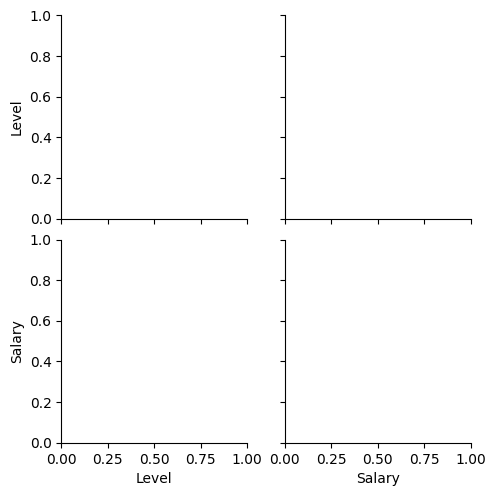

In [7]:
sns.pairplot(dataset)

In [8]:
X = dataset.drop(['Salary'],axis=True)
y=dataset['Salary']

In [9]:
X.shape, y.shape

((10, 1), (10,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [13]:
print('Training Accuary: ', lin_reg.score(X_train,y_train))
print('Testing Accuary: ', lin_reg.score(X_test,y_test))

Training Accuary:  0.6366049276570868
Testing Accuary:  0.8451346684575974


In [14]:
#Polinom regresyon hazır yok o yüzden biz verilerilerde işlemler yaparak ulaşıyoruz.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y_train)
X_poly_test = poly_reg.transform(X_test)


In [17]:
print('Training Accuary: ', lin_reg_2.score(X_poly,y_train))
print('Testing Accuary: ', lin_reg_2.score(X_poly_test,y_test))

Training Accuary:  0.9995857211026753
Testing Accuary:  0.9714666803843249


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


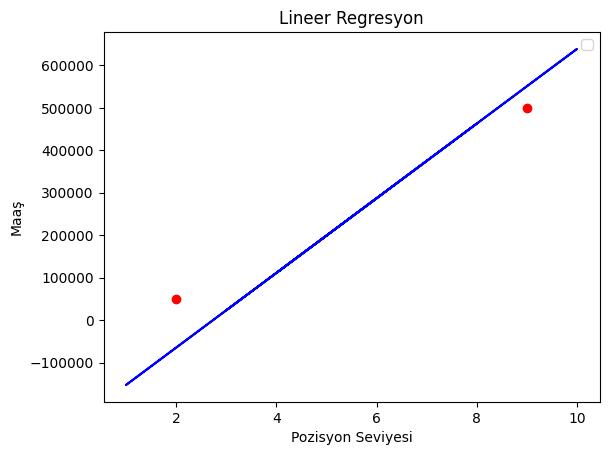

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train),color='blue')
plt.title('Lineer Regresyon')
plt.xlabel('Pozisyon Seviyesi')
plt.ylabel('Maaş')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


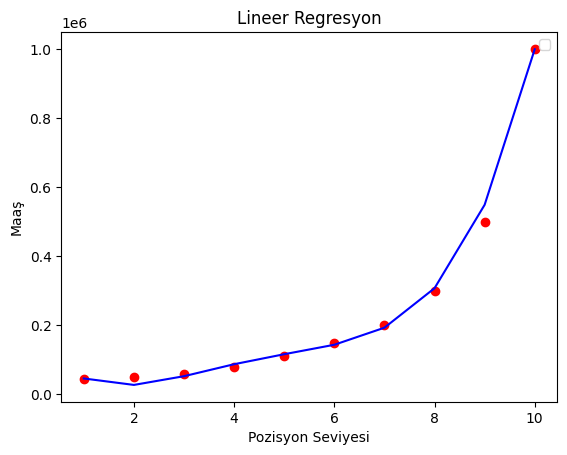

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Lineer Regresyon')
plt.xlabel('Pozisyon Seviyesi')
plt.ylabel('Maaş')
plt.legend()
plt.show()